In [5]:
import os
import pandas as pd
from pandas import isnull

In [6]:
master = pd.read_csv(os.path.join("data", "Master.csv"))
master.head()

,playerID,coachID,hofID,firstName,lastName,nameNote,nameGiven,nameNick,height,weight,...,birthDay,birthCountry,birthState,birthCity,deathYear,deathMon,deathDay,deathCountry,deathState,deathCity
0,aaltoan01,NaN,NaN,Antti,Aalto,NaN,Antti,NaN,73.0,210.0,...,4.0,Finland,NaN,Lappeenranta,NaN,NaN,NaN,NaN,NaN,NaN
1,abbeybr01,NaN,NaN,Bruce,Abbey,NaN,Bruce,NaN,73.0,185.0,...,18.0,Canada,ON,Toronto,NaN,NaN,NaN,NaN,NaN,NaN
2,abbotge01,NaN,NaN,George,Abbott,NaN,George Henry,Preacher,67.0,153.0,...,3.0,Canada,ON,Synenham,NaN,NaN,NaN,NaN,NaN,NaN
3,abbotre01,NaN,NaN,Reg,Abbott,NaN,Reginald Stewart,NaN,71.0,164.0,...,4.0,Canada,MB,Winnipeg,NaN,NaN,NaN,NaN,NaN,NaN
4,abdelju01,NaN,NaN,Justin,Abdelkader,NaN,NaN,NaN,73.0,195.0,...,25.0,USA,MI,Muskegon,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
master.shape

(7761, 31)

In [8]:
master.columns

Index(['playerID', 'coachID', 'hofID', 'firstName', 'lastName', 'nameNote',
       'nameGiven', 'nameNick', 'height', 'weight', 'shootCatch', 'legendsID',
       'ihdbID', 'hrefID', 'firstNHL', 'lastNHL', 'firstWHA', 'lastWHA', 'pos',
       'birthYear', 'birthMon', 'birthDay', 'birthCountry', 'birthState',
       'birthCity', 'deathYear', 'deathMon', 'deathDay', 'deathCountry',
       'deathState', 'deathCity'],
      dtype='object')

In [11]:
master["playerID"].pipe(isnull).value_counts()
# OR
isnull(master["playerID"]).value_counts()

False    7520
True      241
Name: playerID, dtype: int64

In [12]:
master_orig = master.copy()
master = master.dropna(subset=["playerID"])
master.shape

(7520, 31)

In [13]:
master = master.dropna(subset=["firstNHL", "lastNHL"], how="all")
master.shape

(6851, 31)

In [14]:
master = master.loc[master["lastNHL"] >= 1980]
master.shape

(4627, 31)

In [15]:
master = master.filter(regex="(player|pos|^birth)|(Name$)")
master.columns

Index(['playerID', 'firstName', 'lastName', 'pos', 'birthYear', 'birthMon',
       'birthDay', 'birthCountry', 'birthState', 'birthCity'],
      dtype='object')

In [16]:
master["pos"].value_counts()

D      1418
C      1037
L       848
R       832
G       463
F        28
L/C       1
Name: pos, dtype: int64

In [19]:
def make_categorical(df, col_name):
    df.loc[:, col_name] = pd.Categorical(df[col_name])

In [22]:
def mem_mib(df):
    print("{0:.2f} MiB".format(df.memory_usage().sum() / (1024 * 1024)))

In [23]:
make_categorical(master, "pos")
make_categorical(master, "birthCountry")
make_categorical(master, "birthState")
mem_mib(master)

0.30 MiB


In [24]:
master = master.set_index("playerID")
master.head()

,firstName,lastName,pos,birthYear,birthMon,birthDay,birthCountry,birthState,birthCity
playerID,,,,,,,,,
aaltoan01,Antti,Aalto,C,1975.0,3.0,4.0,Finland,NaN,Lappeenranta
abdelju01,Justin,Abdelkader,L,1987.0,2.0,25.0,USA,MI,Muskegon
abidra01,Ramzi,Abid,L,1980.0,3.0,24.0,Canada,QC,Montreal
abrahth01,Thommy,Abrahamsson,D,1947.0,4.0,12.0,Sweden,NaN,Leksand
actonke01,Keith,Acton,C,1958.0,4.0,15.0,Canada,ON,Stouffville


In [27]:
scoring = pd.read_csv(os.path.join("data", "Scoring.csv"))
mem_mib(scoring)
scoring.shape

10.87 MiB


(45967, 31)

In [28]:
def recent_nhl_only(df):
    return df[(df["lgID"] == "NHL") & (df["year"] >= 1980)]

scoring = recent_nhl_only(scoring)
mem_mib(scoring)
scoring.shape

6.99 MiB


(28616, 31)

In [29]:
scoring = scoring.filter(regex="^(?!(Post|PP|SH)).*")
scoring.columns

Index(['playerID', 'year', 'stint', 'tmID', 'lgID', 'pos', 'GP', 'G', 'A',
       'Pts', 'PIM', '+/-', 'GWG', 'GTG', 'SOG'],
      dtype='object')

In [30]:
scoring = scoring.iloc[:, [0, 1, 3, 6, 7, 8, 9, 14]]
scoring.columns

Index(['playerID', 'year', 'tmID', 'GP', 'G', 'A', 'Pts', 'SOG'], dtype='object')

In [31]:
make_categorical(scoring, "tmID")
scoring.head()

,playerID,year,tmID,GP,G,A,Pts,SOG
0,aaltoan01,1997,ANA,3.0,0.0,0.0,0.0,1.0
1,aaltoan01,1998,ANA,73.0,3.0,5.0,8.0,61.0
2,aaltoan01,1999,ANA,63.0,7.0,11.0,18.0,102.0
3,aaltoan01,2000,ANA,12.0,1.0,1.0,2.0,18.0
7,abdelju01,2007,DET,2.0,0.0,0.0,0.0,6.0


In [33]:
scoring = scoring.reset_index(drop=True)
scoring.head()

,playerID,year,tmID,GP,G,A,Pts,SOG
0,aaltoan01,1997,ANA,3.0,0.0,0.0,0.0,1.0
1,aaltoan01,1998,ANA,73.0,3.0,5.0,8.0,61.0
2,aaltoan01,1999,ANA,63.0,7.0,11.0,18.0,102.0
3,aaltoan01,2000,ANA,12.0,1.0,1.0,2.0,18.0
4,abdelju01,2007,DET,2.0,0.0,0.0,0.0,6.0


In [34]:
teams = pd.read_csv(os.path.join("data", "Teams.csv"))
teams.shape

(1519, 27)

In [35]:
teams = recent_nhl_only(teams)
teams = teams[["year", "tmID", "name"]]
teams.head()

,year,tmID,name
727,1980,BOS,Boston Bruins
728,1980,BUF,Buffalo Sabres
729,1980,CAL,Calgary Flames
730,1980,CHI,Chicago Black Hawks
731,1980,COR,Colorado Rockies


In [36]:
teams.nunique()

year    31
tmID    37
name    37
dtype: int64

In [37]:
make_categorical(teams, "tmID")

In [38]:
team_splits = pd.read_csv(os.path.join("data", "TeamSplits.csv"))
team_splits.shape

(1519, 43)

In [39]:
team_splits = recent_nhl_only(team_splits)

In [41]:
cols_to_drop = team_splits.columns[3:11]
team_splits = team_splits.drop(columns=cols_to_drop)
team_splits = team_splits.drop(columns="lgID")
team_splits.columns

Index(['year', 'tmID', 'NovW', 'NovL', 'NovT', 'NovOL', 'DecW', 'DecL', 'DecT',
       'DecOL', 'JanW', 'JanL', 'JanT', 'JanOL', 'FebW', 'FebL', 'FebT',
       'FebOL', 'MarW', 'MarL', 'MarT', 'MarOL', 'AprW', 'AprL', 'AprT',
       'AprOL'],
      dtype='object')

In [42]:
make_categorical(team_splits, "tmID")

In [45]:
master.head(2)

,firstName,lastName,pos,birthYear,birthMon,birthDay,birthCountry,birthState,birthCity
playerID,,,,,,,,,
aaltoan01,Antti,Aalto,C,1975.0,3.0,4.0,Finland,NaN,Lappeenranta
abdelju01,Justin,Abdelkader,L,1987.0,2.0,25.0,USA,MI,Muskegon


In [46]:
scoring.head(2)

,playerID,year,tmID,GP,G,A,Pts,SOG
0,aaltoan01,1997,ANA,3.0,0.0,0.0,0.0,1.0
1,aaltoan01,1998,ANA,73.0,3.0,5.0,8.0,61.0


In [47]:
# since not specified - is inner by default
pd.merge(master, scoring, left_index=True, right_on="playerID").head()

,firstName,lastName,pos,birthYear,birthMon,birthDay,birthCountry,birthState,birthCity,playerID,year,tmID,GP,G,A,Pts,SOG
0,Antti,Aalto,C,1975.0,3.0,4.0,Finland,NaN,Lappeenranta,aaltoan01,1997,ANA,3.0,0.0,0.0,0.0,1.0
1,Antti,Aalto,C,1975.0,3.0,4.0,Finland,NaN,Lappeenranta,aaltoan01,1998,ANA,73.0,3.0,5.0,8.0,61.0
2,Antti,Aalto,C,1975.0,3.0,4.0,Finland,NaN,Lappeenranta,aaltoan01,1999,ANA,63.0,7.0,11.0,18.0,102.0
3,Antti,Aalto,C,1975.0,3.0,4.0,Finland,NaN,Lappeenranta,aaltoan01,2000,ANA,12.0,1.0,1.0,2.0,18.0
4,Justin,Abdelkader,L,1987.0,2.0,25.0,USA,MI,Muskegon,abdelju01,2007,DET,2.0,0.0,0.0,0.0,6.0


In [48]:
print(
    pd.merge(master, scoring, left_index=True, right_on="playerID").shape,
    pd.merge(master, scoring, left_index=True, right_on="playerID", how="right").shape
)

(28616, 17) (28616, 17)


In [49]:
merged = pd.merge(master, scoring, left_index=True, right_on="playerID", how="right", indicator=True)
merged.head()

,firstName,lastName,pos,birthYear,birthMon,birthDay,birthCountry,birthState,birthCity,playerID,year,tmID,GP,G,A,Pts,SOG,_merge
0,Antti,Aalto,C,1975.0,3.0,4.0,Finland,NaN,Lappeenranta,aaltoan01,1997,ANA,3.0,0.0,0.0,0.0,1.0,both
1,Antti,Aalto,C,1975.0,3.0,4.0,Finland,NaN,Lappeenranta,aaltoan01,1998,ANA,73.0,3.0,5.0,8.0,61.0,both
2,Antti,Aalto,C,1975.0,3.0,4.0,Finland,NaN,Lappeenranta,aaltoan01,1999,ANA,63.0,7.0,11.0,18.0,102.0,both
3,Antti,Aalto,C,1975.0,3.0,4.0,Finland,NaN,Lappeenranta,aaltoan01,2000,ANA,12.0,1.0,1.0,2.0,18.0,both
4,Justin,Abdelkader,L,1987.0,2.0,25.0,USA,MI,Muskegon,abdelju01,2007,DET,2.0,0.0,0.0,0.0,6.0,both


In [50]:
merged["_merge"].value_counts()

both          28616
right_only        0
left_only         0
Name: _merge, dtype: int64

In [51]:
merged = merged.filter(regex="^(?!(birth)).*")
merged.head()

,firstName,lastName,pos,playerID,year,tmID,GP,G,A,Pts,SOG,_merge
0,Antti,Aalto,C,aaltoan01,1997,ANA,3.0,0.0,0.0,0.0,1.0,both
1,Antti,Aalto,C,aaltoan01,1998,ANA,73.0,3.0,5.0,8.0,61.0,both
2,Antti,Aalto,C,aaltoan01,1999,ANA,63.0,7.0,11.0,18.0,102.0,both
3,Antti,Aalto,C,aaltoan01,2000,ANA,12.0,1.0,1.0,2.0,18.0,both
4,Justin,Abdelkader,L,abdelju01,2007,DET,2.0,0.0,0.0,0.0,6.0,both


In [56]:
teams2 = teams[["tmID", "name"]]
teams2 = teams2.drop_duplicates()
teams2["tmID"].value_counts().head()
# there exists team that changed the name

CHI    2
MIN    1
HAR    1
FLO    1
EDM    1
Name: tmID, dtype: int64

In [57]:
teams2.loc[teams2["tmID"] == "CHI"]

,tmID,name
730,CHI,Chicago Black Hawks
856,CHI,Chicago Blackhawks


In [58]:
pd.merge(team_splits, teams, left_on=["tmID", "year"], right_on=["tmID", "year"]).head(4)

,year,tmID,NovW,NovL,NovT,NovOL,DecW,DecL,DecT,DecOL,...,FebOL,MarW,MarL,MarT,MarOL,AprW,AprL,AprT,AprOL,name
0,1980,BOS,5.0,3.0,5.0,NaN,6.0,6.0,1.0,NaN,...,NaN,8.0,4.0,3.0,NaN,1.0,2.0,0.0,NaN,Boston Bruins
1,1980,BUF,8.0,4.0,3.0,NaN,5.0,3.0,4.0,NaN,...,NaN,8.0,6.0,1.0,NaN,1.0,1.0,1.0,NaN,Buffalo Sabres
2,1980,CAL,5.0,5.0,3.0,NaN,6.0,3.0,3.0,NaN,...,NaN,6.0,6.0,2.0,NaN,2.0,0.0,0.0,NaN,Calgary Flames
3,1980,CHI,3.0,8.0,3.0,NaN,3.0,9.0,1.0,NaN,...,NaN,4.0,5.0,4.0,NaN,1.0,1.0,1.0,NaN,Chicago Black Hawks


In [59]:
pd.merge(team_splits, teams, on=["tmID"]).head().filter(like="year")

,year_x,year_y
0,1980,1980
1,1980,1981
2,1980,1982
3,1980,1983
4,1980,1984


In [60]:
merged_teams = pd.merge(team_splits, teams, on=["tmID", "year"])
merged_teams.head(3)

,year,tmID,NovW,NovL,NovT,NovOL,DecW,DecL,DecT,DecOL,...,FebOL,MarW,MarL,MarT,MarOL,AprW,AprL,AprT,AprOL,name
0,1980,BOS,5.0,3.0,5.0,NaN,6.0,6.0,1.0,NaN,...,NaN,8.0,4.0,3.0,NaN,1.0,2.0,0.0,NaN,Boston Bruins
1,1980,BUF,8.0,4.0,3.0,NaN,5.0,3.0,4.0,NaN,...,NaN,8.0,6.0,1.0,NaN,1.0,1.0,1.0,NaN,Buffalo Sabres
2,1980,CAL,5.0,5.0,3.0,NaN,6.0,3.0,3.0,NaN,...,NaN,6.0,6.0,2.0,NaN,2.0,0.0,0.0,NaN,Calgary Flames


In [71]:
three_years = scoring.loc[(scoring.year > 2000) & (scoring.year < 2004)]

# one record per player/year
three_years = three_years.drop_duplicates(subset=["playerID", "year"])

# get three random players with complete history between 2001-2003
counts = three_years["playerID"].value_counts()
ids = counts[counts == 3].sample(3).index

# get actual records corresponding for those players
df3 = three_years.loc[three_years["playerID"].isin(ids)]
basic_df3 = df3[["playerID", "year", "G"]]
basic_df3

,playerID,year,G
19804,pecami01,2001,25.0
19805,pecami01,2002,13.0
19806,pecami01,2003,11.0
22569,samsose01,2001,29.0
22570,samsose01,2002,5.0
22571,samsose01,2003,17.0
27159,wardaa01,2001,3.0
27160,wardaa01,2002,3.0
27161,wardaa01,2003,3.0


In [72]:
pivot = basic_df3.pivot(index="playerID", columns="year", values="G")
pivot

year,2001,2002,2003
playerID,,,
pecami01,25.0,13.0,11.0
samsose01,29.0,5.0,17.0
wardaa01,3.0,3.0,3.0


<AxesSubplot:xlabel='playerID'>

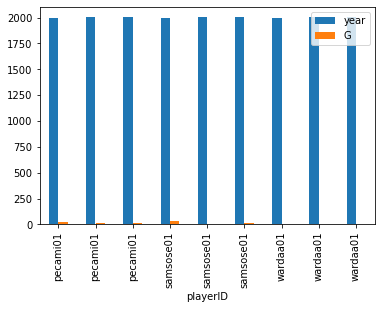

In [73]:
basic_df3.set_index("playerID").plot.bar() # does not make any sense

<AxesSubplot:xlabel='playerID'>

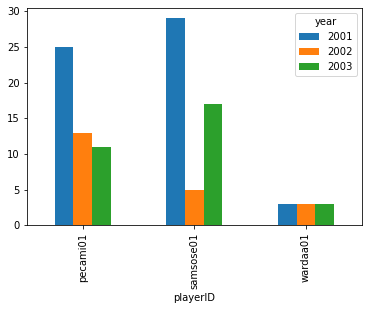

In [74]:
pivot.plot.bar()

In [75]:
pivot = pivot.reset_index()
pivot.columns.name = None
pivot

,playerID,2001,2002,2003
0,pecami01,25.0,13.0,11.0
1,samsose01,29.0,5.0,17.0
2,wardaa01,3.0,3.0,3.0


In [76]:
pivot.melt()

,variable,value
0,playerID,pecami01
1,playerID,samsose01
2,playerID,wardaa01
3,2001,25
4,2001,29
5,2001,3
6,2002,13
7,2002,5
8,2002,3
9,2003,11


In [77]:
pivot.melt(id_vars="playerID")

,playerID,variable,value
0,pecami01,2001,25.0
1,samsose01,2001,29.0
2,wardaa01,2001,3.0
3,pecami01,2002,13.0
4,samsose01,2002,5.0
5,wardaa01,2002,3.0
6,pecami01,2003,11.0
7,samsose01,2003,17.0
8,wardaa01,2003,3.0


In [79]:
pivot.melt(id_vars="playerID", var_name="year", value_name="goals")

,playerID,year,goals
0,pecami01,2001,25.0
1,samsose01,2001,29.0
2,wardaa01,2001,3.0
3,pecami01,2002,13.0
4,samsose01,2002,5.0
5,wardaa01,2002,3.0
6,pecami01,2003,11.0
7,samsose01,2003,17.0
8,wardaa01,2003,3.0


In [80]:
pivot.melt(id_vars="playerID", value_vars=[2001, 2002], var_name="year", value_name="goals")

,playerID,year,goals
0,pecami01,2001,25.0
1,samsose01,2001,29.0
2,wardaa01,2001,3.0
3,pecami01,2002,13.0
4,samsose01,2002,5.0
5,wardaa01,2002,3.0


In [82]:
# create multi index
mi = scoring.set_index(["playerID", "year"])
mi.head()

tmID    GP    G     A   Pts    SOG
playerID  year                                   
aaltoan01 1997  ANA   3.0  0.0   0.0   0.0    1.0
          1998  ANA  73.0  3.0   5.0   8.0   61.0
          1999  ANA  63.0  7.0  11.0  18.0  102.0
          2000  ANA  12.0  1.0   1.0   2.0   18.0
abdelju01 2007  DET   2.0  0.0   0.0   0.0    6.0

In [83]:
mi.loc[("gretzwa01", 1982), : ]

,,tmID,GP,G,A,Pts,SOG
playerID,year,,,,,,
gretzwa01,1982,EDM,80.0,71.0,125.0,196.0,348.0


In [85]:
idx = pd.IndexSlice
mi2 = mi.sort_index() # must be lexicographically sorted in order for sliding to work
mi.index.is_lexsorted()

True

In [86]:
sliced = mi.loc[idx[:, 1997:2000], :]
sliced.head()

tmID    GP    G     A   Pts    SOG
playerID  year                                   
aaltoan01 1997  ANA   3.0  0.0   0.0   0.0    1.0
          1998  ANA  73.0  3.0   5.0   8.0   61.0
          1999  ANA  63.0  7.0  11.0  18.0  102.0
          2000  ANA  12.0  1.0   1.0   2.0   18.0
adamsbr01 1999  ATL   2.0  0.0   0.0   0.0    1.0

In [87]:
sliced = mi.loc[idx["aaltoan01":"adamscr01", 1997:2004:2], :]
sliced.head()

tmID    GP    G     A   Pts    SOG
playerID  year                                   
aaltoan01 1997  ANA   3.0  0.0   0.0   0.0    1.0
          1999  ANA  63.0  7.0  11.0  18.0  102.0
abidra01  2003  PIT  16.0  3.0   2.0   5.0   35.0
adamsbr01 1999  ATL   2.0  0.0   0.0   0.0    1.0
adamscr01 2001  CAR  33.0  0.0   1.0   1.0   17.0

In [88]:
import numpy as np

def get_many_locs(df, slices):
    arr = np.empty(0, dtype="int")
    for s in slices:
        locs = df.index.get_locs((s))
        arr = np.concatenate((arr, locs))
    return arr

locs = get_many_locs(
    mi,
    (
        idx["aaltoan01":"adamscr01", 1997:2000],
        idx["aaltoan01":"adamscr01", 2004:2006]
    )
)

locs

array([ 0,  1,  2,  3, 36, 37, 38, 12, 13, 42, 43])

In [90]:
sliced = mi.iloc[locs, :]
sliced.head(10)

tmID    GP     G     A   Pts    SOG
playerID  year                                    
aaltoan01 1997  ANA   3.0   0.0   0.0   0.0    1.0
          1998  ANA  73.0   3.0   5.0   8.0   61.0
          1999  ANA  63.0   7.0  11.0  18.0  102.0
          2000  ANA  12.0   1.0   1.0   2.0   18.0
adamsbr01 1999  ATL   2.0   0.0   0.0   0.0    1.0
          2000  ATL   9.0   0.0   1.0   1.0    3.0
adamscr01 2000  CAR  44.0   1.0   0.0   1.0   15.0
abidra01  2005  ATL   6.0   0.0   2.0   2.0    6.0
          2006  NAS  13.0   1.0   4.0   5.0   12.0
adamscr01 2005  CAR  67.0  10.0  11.0  21.0   68.0

In [91]:
mi = mi.sort_index(level="year")
mi.index.is_lexsorted()

False

In [92]:
team_splits.head(5)

,year,tmID,NovW,NovL,NovT,NovOL,DecW,DecL,DecT,DecOL,...,FebT,FebOL,MarW,MarL,MarT,MarOL,AprW,AprL,AprT,AprOL
727,1980,BOS,5.0,3.0,5.0,NaN,6.0,6.0,1.0,NaN,...,2.0,NaN,8.0,4.0,3.0,NaN,1.0,2.0,0.0,NaN
728,1980,BUF,8.0,4.0,3.0,NaN,5.0,3.0,4.0,NaN,...,3.0,NaN,8.0,6.0,1.0,NaN,1.0,1.0,1.0,NaN
729,1980,CAL,5.0,5.0,3.0,NaN,6.0,3.0,3.0,NaN,...,1.0,NaN,6.0,6.0,2.0,NaN,2.0,0.0,0.0,NaN
730,1980,CHI,3.0,8.0,3.0,NaN,3.0,9.0,1.0,NaN,...,4.0,NaN,4.0,5.0,4.0,NaN,1.0,1.0,1.0,NaN
731,1980,COR,5.0,6.0,2.0,NaN,4.0,9.0,2.0,NaN,...,2.0,NaN,4.0,9.0,1.0,NaN,0.0,1.0,2.0,NaN


In [94]:
merged_teams = merged_teams.drop(columns=["tmID"])
merged_teams = merged_teams.set_index(["year", "name"])
merged_teams.head()

NovW  NovL  NovT  NovOL  DecW  DecL  DecT  DecOL  \
year name                                                                    
1980 Boston Bruins         5.0   3.0   5.0    NaN   6.0   6.0   1.0    NaN   
     Buffalo Sabres        8.0   4.0   3.0    NaN   5.0   3.0   4.0    NaN   
     Calgary Flames        5.0   5.0   3.0    NaN   6.0   3.0   3.0    NaN   
     Chicago Black Hawks   3.0   8.0   3.0    NaN   3.0   9.0   1.0    NaN   
     Colorado Rockies      5.0   6.0   2.0    NaN   4.0   9.0   2.0    NaN   

                          JanW  JanL  ...  FebT  FebOL  MarW  MarL  MarT  \
year name                             ...                                  
1980 Boston Bruins         9.0   4.0  ...   2.0    NaN   8.0   4.0   3.0   
     Buffalo Sabres        6.0   1.0  ...   3.0    NaN   8.0   6.0   1.0   
     Calgary Flames        6.0   7.0  ...   1.0    NaN   6.0   6.0   2.0   
     Chicago Black Hawks   9.0   3.0  ...   4.0    NaN   4.0   5.0   4.0   
     Colorado Rockies      3.0   8.0  ...   2.0    NaN   4.0   9.0   1.0   

                          MarOL  AprW  AprL  AprT  AprOL  
year name                                                 
1980 Boston Bruins          NaN   1.0   2.0   0.0    NaN  
     Buffalo Sabres         NaN   1.0   1.0   1.0    NaN  
     Calgary Flames         NaN   2.0   0.0   0.0    NaN  
     Chicago Black Hawks    NaN   1.0   1.0   1.0    NaN  
     Colorado Rockies       NaN   0.0   1.0   2.0    NaN  

[5 rows x 24 columns]

In [95]:
months = merged_teams.columns.map(lambda x: x[:3])
metrics = merged_teams.columns.map(lambda x: x[3:])
print(months)
print(metrics)

Index(['Nov', 'Nov', 'Nov', 'Nov', 'Dec', 'Dec', 'Dec', 'Dec', 'Jan', 'Jan',
       'Jan', 'Jan', 'Feb', 'Feb', 'Feb', 'Feb', 'Mar', 'Mar', 'Mar', 'Mar',
       'Apr', 'Apr', 'Apr', 'Apr'],
      dtype='object')
Index(['W', 'L', 'T', 'OL', 'W', 'L', 'T', 'OL', 'W', 'L', 'T', 'OL', 'W', 'L',
       'T', 'OL', 'W', 'L', 'T', 'OL', 'W', 'L', 'T', 'OL'],
      dtype='object')


In [96]:
midx = pd.MultiIndex.from_arrays([months, metrics])
midx

MultiIndex([('Nov',  'W'),
            ('Nov',  'L'),
            ('Nov',  'T'),
            ('Nov', 'OL'),
            ('Dec',  'W'),
            ('Dec',  'L'),
            ('Dec',  'T'),
            ('Dec', 'OL'),
            ('Jan',  'W'),
            ('Jan',  'L'),
            ('Jan',  'T'),
            ('Jan', 'OL'),
            ('Feb',  'W'),
            ('Feb',  'L'),
            ('Feb',  'T'),
            ('Feb', 'OL'),
            ('Mar',  'W'),
            ('Mar',  'L'),
            ('Mar',  'T'),
            ('Mar', 'OL'),
            ('Apr',  'W'),
            ('Apr',  'L'),
            ('Apr',  'T'),
            ('Apr', 'OL')],
           )

In [97]:
merged_teams.columns = midx
merged_teams.head()

Nov                Dec                Jan       ...  \
                            W    L    T  OL    W    L    T  OL    W    L  ...   
year name                                                                 ...   
1980 Boston Bruins        5.0  3.0  5.0 NaN  6.0  6.0  1.0 NaN  9.0  4.0  ...   
     Buffalo Sabres       8.0  4.0  3.0 NaN  5.0  3.0  4.0 NaN  6.0  1.0  ...   
     Calgary Flames       5.0  5.0  3.0 NaN  6.0  3.0  3.0 NaN  6.0  7.0  ...   
     Chicago Black Hawks  3.0  8.0  3.0 NaN  3.0  9.0  1.0 NaN  9.0  3.0  ...   
     Colorado Rockies     5.0  6.0  2.0 NaN  4.0  9.0  2.0 NaN  3.0  8.0  ...   

                          Feb      Mar                Apr                
                            T  OL    W    L    T  OL    W    L    T  OL  
year name                                                                
1980 Boston Bruins        2.0 NaN  8.0  4.0  3.0 NaN  1.0  2.0  0.0 NaN  
     Buffalo Sabres       3.0 NaN  8.0  6.0  1.0 NaN  1.0  1.0  1.0 NaN  
     Calgary Flames       1.0 NaN  6.0  6.0  2.0 NaN  2.0  0.0  0.0 NaN  
     Chicago Black Hawks  4.0 NaN  4.0  5.0  4.0 NaN  1.0  1.0  1.0 NaN  
     Colorado Rockies     2.0 NaN  4.0  9.0  1.0 NaN  0.0  1.0  2.0 NaN  

[5 rows x 24 columns]

In [98]:
merged_teams = merged_teams.stack(level=0)
merged_teams.head(10)

L  OL    T    W
year name                                 
1980 Boston Bruins  Apr  2.0 NaN  0.0  1.0
                    Dec  6.0 NaN  1.0  6.0
                    Feb  4.0 NaN  2.0  6.0
                    Jan  4.0 NaN  1.0  9.0
                    Mar  4.0 NaN  3.0  8.0
                    Nov  3.0 NaN  5.0  5.0
     Buffalo Sabres Apr  1.0 NaN  1.0  1.0
                    Dec  3.0 NaN  4.0  5.0
                    Feb  3.0 NaN  3.0  6.0
                    Jan  1.0 NaN  7.0  6.0

In [99]:
merged_teams = merged_teams.swaplevel(1, 2)
merged_teams.head()

L  OL    T    W
year     name                            
1980 Apr Boston Bruins  2.0 NaN  0.0  1.0
     Dec Boston Bruins  6.0 NaN  1.0  6.0
     Feb Boston Bruins  4.0 NaN  2.0  6.0
     Jan Boston Bruins  4.0 NaN  1.0  9.0
     Mar Boston Bruins  4.0 NaN  3.0  8.0

In [100]:
merged_teams = merged_teams.reorder_levels([2, 0, 1])
merged_teams.head()

L  OL    T    W
name          year                       
Boston Bruins 1980 Apr  2.0 NaN  0.0  1.0
                   Dec  6.0 NaN  1.0  6.0
                   Feb  4.0 NaN  2.0  6.0
                   Jan  4.0 NaN  1.0  9.0
                   Mar  4.0 NaN  3.0  8.0

In [102]:
merged_teams.index.levels[2].name = "month"
merged_teams.head()

RuntimeError: Cannot set name on a level of a MultiIndex. Use 'MultiIndex.set_names' instead.

In [103]:
merged_teams.groupby(level=["name", "year"]).sum().head(10)

L    OL     T     W
name              year                        
Anaheim Ducks     2006  20.0  11.0   0.0  39.0
                  2007  20.0   6.0   0.0  43.0
                  2008  28.0   6.0   0.0  36.0
                  2009  26.0   9.0   0.0  35.0
                  2010  23.0   4.0   0.0  43.0
                  2011  31.0  11.0   0.0  29.0
Atlanta Thrashers 1999  52.0   3.0   5.0  12.0
                  2000  42.0   2.0   7.0  22.0
                  2001  43.0   3.0  10.0  16.0
                  2002  31.0   4.0   6.0  31.0

In [104]:
merged_teams.unstack(level=["year", "month"]).head()

KeyError: 'Level month not found'